In [3]:
!pip install shap



In [4]:
import pandas as pd
import numpy as np

import shap
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load expression data (genes x samples)
expr = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_log_normalized.csv",
    index_col=0
)

# Load metadata
metadata = pd.read_csv(
    "C:/Users/Aina Rif'ah/Downloads/INTERNSHIP/PROJECT 2/data/processed/GSE112509_metadata.csv",
    index_col=0
)

# Feature matrix (samples x genes)
X = expr.T

# Labels
y = metadata.loc[X.index, "condition"]

X.shape, y.value_counts()


((79, 29830),
 condition
 Melanoma    56
 Benign      23
 Name: count, dtype: int64)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

dict(zip(le.classes_, le.transform(le.classes_)))


{'Benign': np.int64(0), 'Melanoma': np.int64(1)}

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_enc, y_test_enc = train_test_split(
    X,
    y_enc,
    test_size=0.25,
    random_state=42,
    stratify=y_enc
)

X_train.shape, X_test.shape


((59, 29830), (20, 29830))

In [11]:
# SHAP explainer for linear models
explainer = shap.Explainer(
    lr_pipeline.named_steps["clf"],
    lr_pipeline.named_steps["scaler"].transform(X_train)
)


In [12]:
X_test_scaled = lr_pipeline.named_steps["scaler"].transform(X_test)

shap_values = explainer(X_test_scaled)

shap_values.shape


(20, 29830)

In [9]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train_enc)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [10]:
hasattr(xgb, "_Booster")


True

In [15]:
# Mean absolute SHAP value per gene
shap_importance = np.abs(shap_values.values).mean(axis=0)

shap_df = pd.DataFrame({
    "Gene": X.columns,
    "Mean_Abs_SHAP": shap_importance
}).sort_values("Mean_Abs_SHAP", ascending=False)

shap_df.head(20)


,Gene,Mean_Abs_SHAP
5916,105374042,0.010400
531,2537,0.009348
20149,56936,0.009214
14660,105376342,0.008867
17996,359,0.008764
1811,353145,0.008141
14112,570,0.008135
10521,101928277,0.007835
10890,80727,0.007794
1851,6279,0.007773


In [11]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)


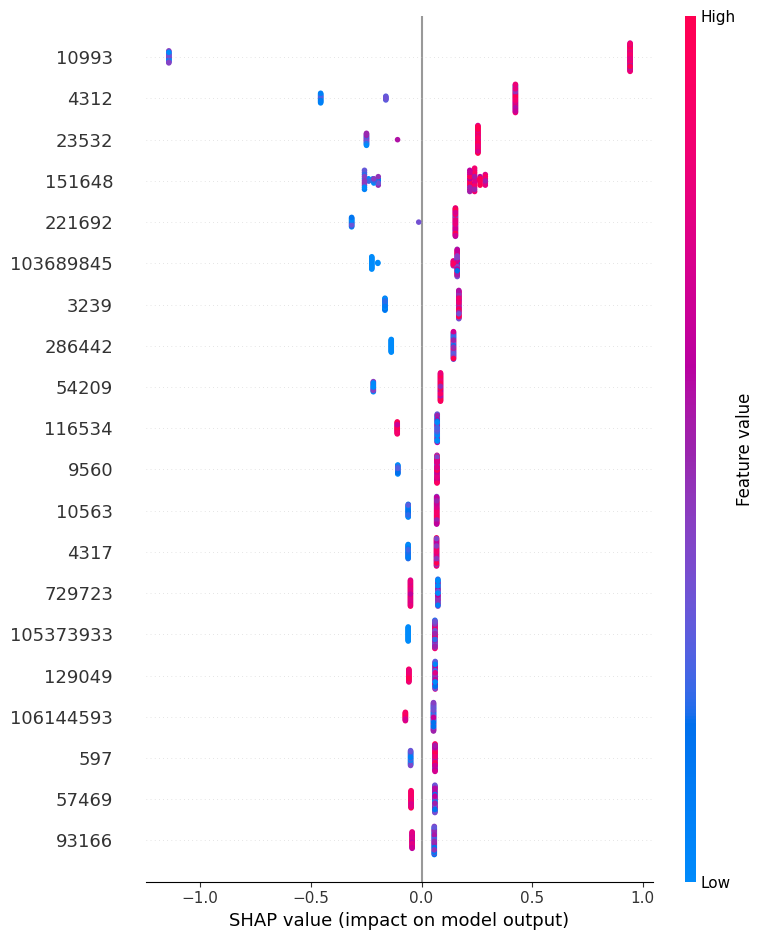

In [12]:
shap.summary_plot(
    shap_values,
    X_train,
    feature_names=X_train.columns
)



In [13]:
import numpy as np
import pandas as pd

# Calculate mean absolute SHAP value per gene
mean_shap = np.abs(shap_values).mean(axis=0)

# Create ranked SHAP table
shap_df = pd.DataFrame({
    "Gene_ID": X_train.columns,
    "Mean_SHAP": mean_shap
}).sort_values(by="Mean_SHAP", ascending=False)

shap_df.head(20)


,Gene_ID,Mean_SHAP
18692,10993,1.003327
17073,4312,0.405073
28068,23532,0.250479
5236,151648,0.240930
9405,221692,0.192191
19146,103689845,0.177680
4467,3239,0.167498
28872,286442,0.141943
9946,54209,0.121543
15957,116534,0.082855


In [14]:
top_shap_genes = shap_df.head(50)
top_shap_genes


,Gene_ID,Mean_SHAP
18692,10993,1.003327
17073,4312,0.405073
28068,23532,0.250479
5236,151648,0.240930
9405,221692,0.192191
19146,103689845,0.177680
4467,3239,0.167498
28872,286442,0.141943
9946,54209,0.121543
15957,116534,0.082855


In [15]:
top_shap_genes.to_csv("top_50_SHAP_genes.csv", index=False)


In [18]:
import joblib

joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(X_train.columns.tolist(), "gene_list.pkl")
joblib.dump(shap_df, "shap_genes.pkl")


['shap_genes.pkl']